<a href="https://colab.research.google.com/github/mhadiniknam/AP-AUT-Second-Semester/blob/main/Tree_Traverse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

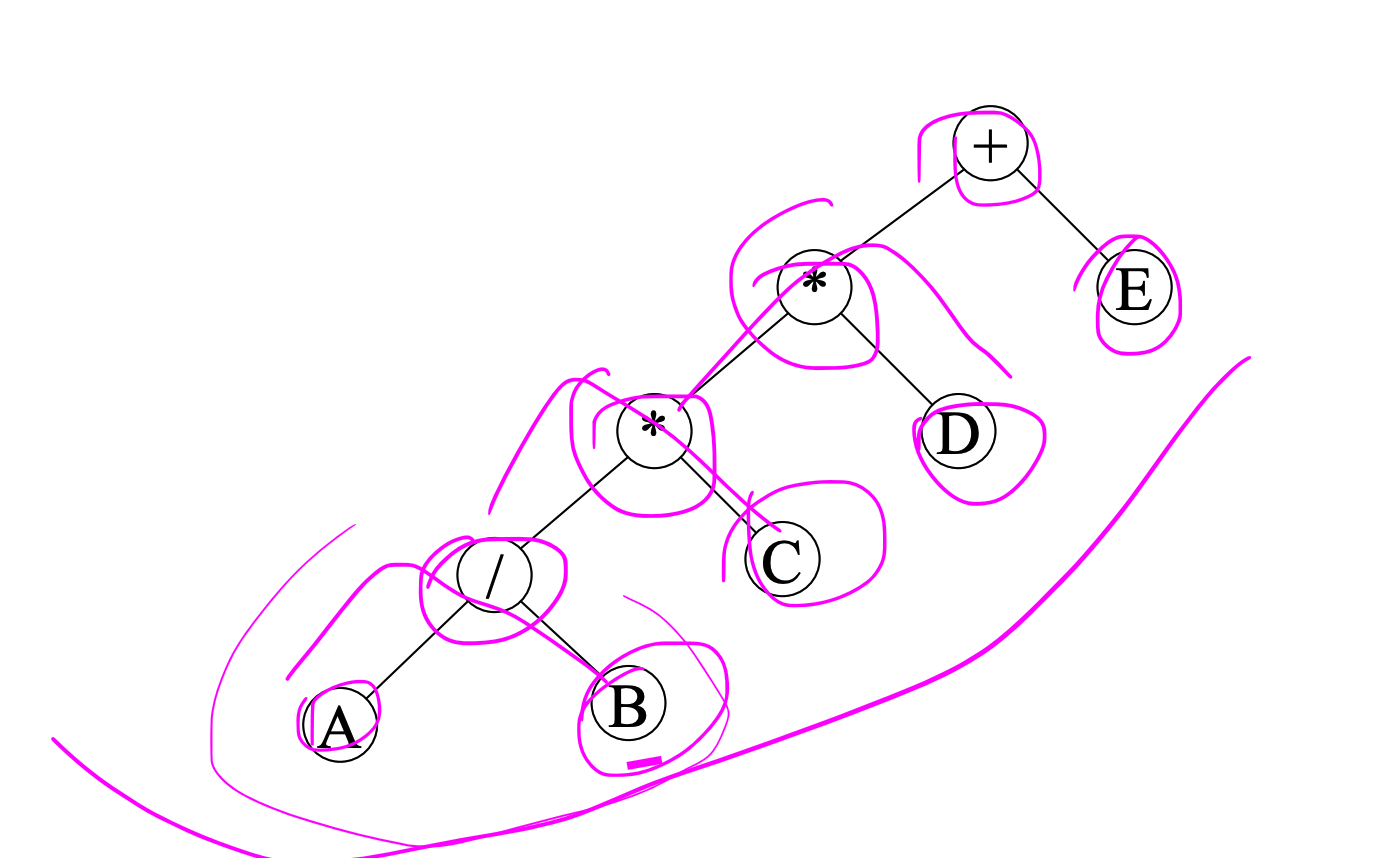

# LVR , LRV , VLR

خب عملا نمیشه گفت که کدوم یک از اینا دی اف اس هستند و کدوم بی اف اس ولی می
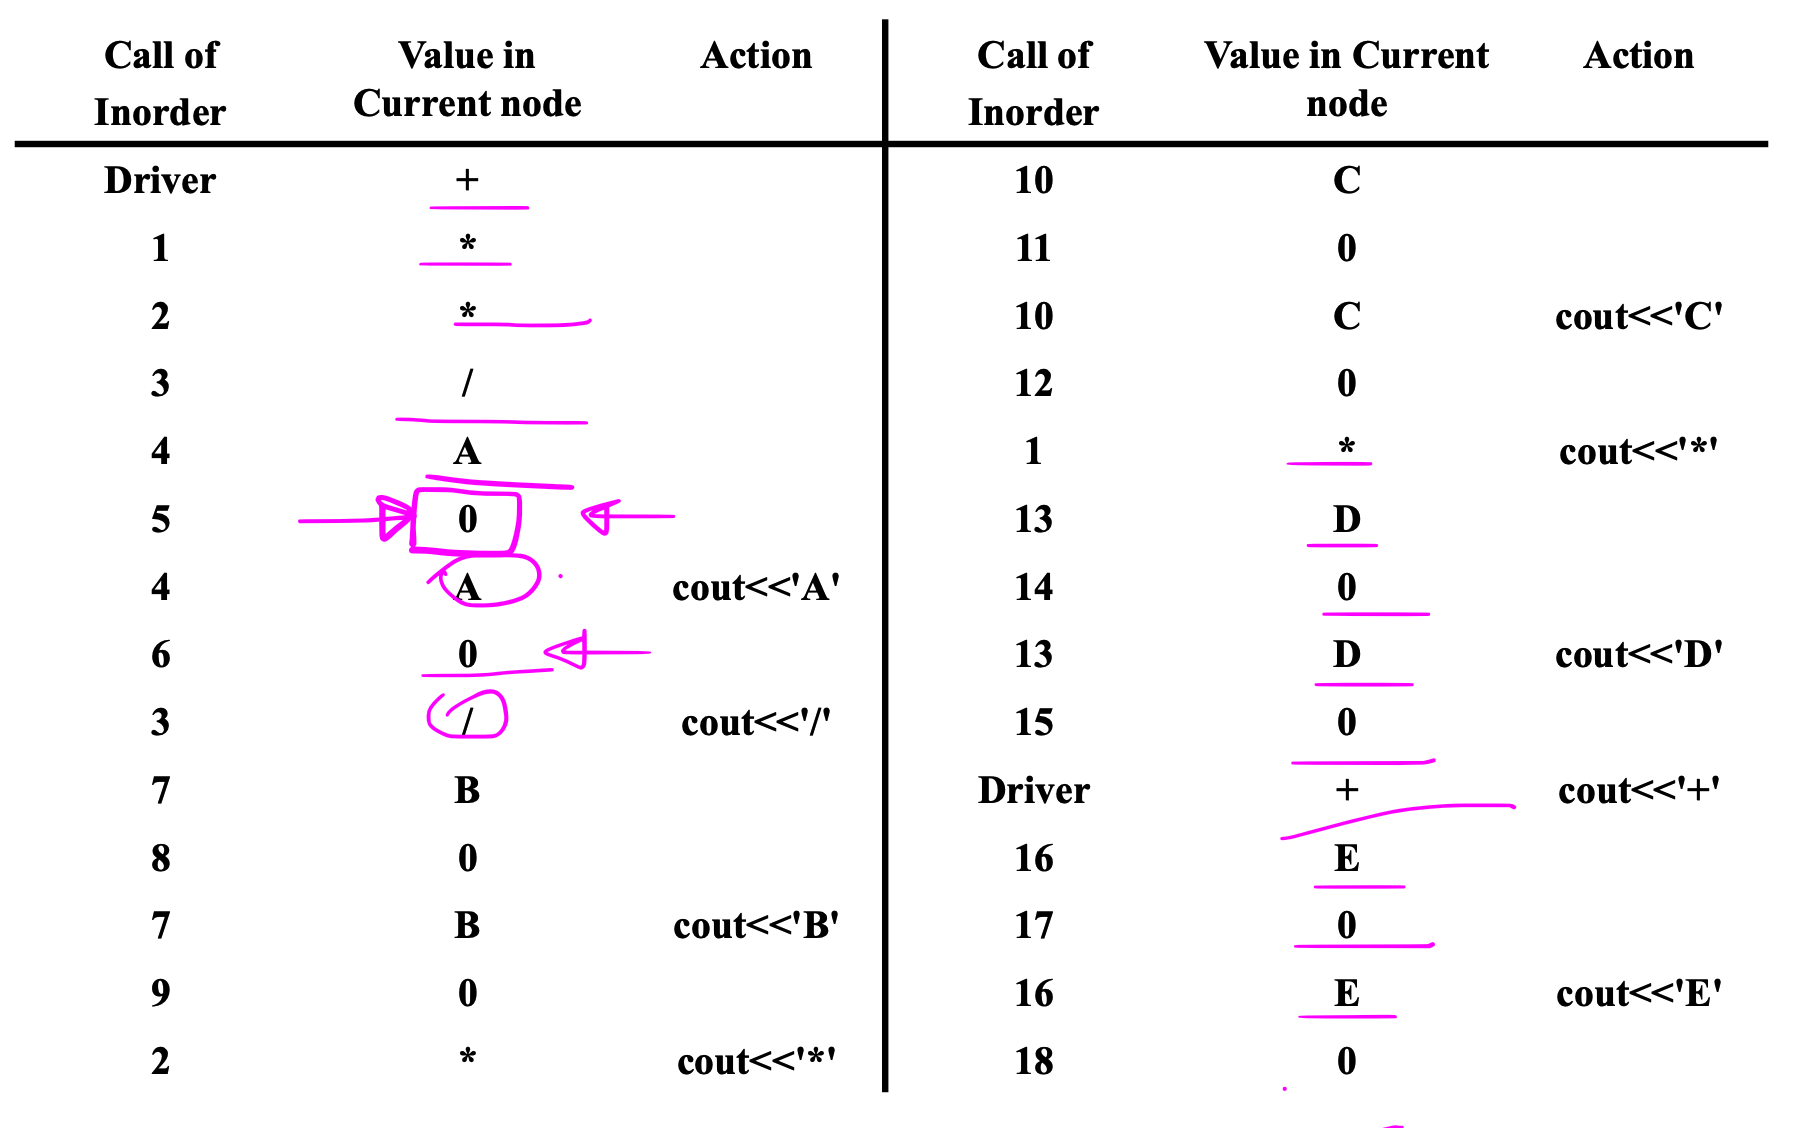

شکل بالا دقیقا ایمپلمنتیشن ال وی آر هست

# Defining the Tree

In [ ]:
from dataclasses import dataclass

@dataclass
class Node():
  data : int
  right : 'Node' = None
  left : 'Node' = None

@dataclass
class Tree(object):

    """
    The below tree
        1
       / \
      2   3
     / \
    4   5
    """
    tree = Node(1)
    tree.left = Node(2)
    tree.right = Node(3)
from dataclasses import dataclass

@dataclass
class Node():
  data : int
  right : 'Node' = None
  left : 'Node' = None

def Tree():
    """
    The below tree
        1
       / \
      2   3
     / \
    4   5
    """
    tree = Node(1)
    tree.left = Node(2)
    tree.right = Node(3)
    tree.left.left = Node(4)
    tree.left.right = Node(5)
    return tree

https://en.wikipedia.org/wiki/Tree_traversal

صفحه ویکی پدیاش هم کلی توضیح داره

In [ ]:
def PostOrder(tree):
  # LRV
  if tree:
    PostOrder(tree.left)
    PostOrder(tree.right)
    print(tree.data)
    # we could Write it this way :
    # yield(tree.data)

def InOrder(tree):
  # LVR
  if tree:
    InOrder(tree.left)
    print(tree.data)
    InOrder(tree.right)

def preOrder(tree):
  # VLR
  if tree:
    print(tree.data)
    preOrder(tree.left)
    preOrder(tree.right)

اون صفحه ویکی پدیا رو هم نگاه کنی کلا ۶ مدل میشه این درخت ها رو ترورس کرد

و فرقشون دقیقا در نحوه نوشتن اون چیزی هست که اون بالا نوشتیم
جایگشت های اون ۳ تابع عملا میشه ترورس های مخلتفش

که البته بخاطر تقارن اونا فقط میشن حالت ریورس این بزرگواران



```
        1
       / \
      2   3
     / \
    4   5
    
```



In [ ]:
a = Tree()

print("PostOrder")
PostOrder(a)
print("InOrder")
InOrder(a)
print("preOrder")
preOrder(a)

PostOrder
4
5
2
3
1
InOrder
4
2
5
1
3
preOrder
1
2
4
5
3


عملا از مسئله بالا هم یه شهود خوبی میگیری که این تابع ها دارن چطور فراخوانی میشن
این اوردر یعنی دقیقا وسط داره فراخوانی میشه
پوست اردر هم دقیقا یعنی وی بعد از اینه که پایینیاشو صدا زد

# Making the Post order of the Expression

کافیه اون درخت مربوط بهش رو داشته باشی
بعدش می تونی شروع کنی هر ترتیبی که از دوست داری رو جنریت کنی

In [ ]:
class Stack:
    def __init__(self):
        self.items = []

    def is_empty(self):
        return len(self.items) == 0

    def push(self, item):
        self.items.append(item)

    def pop(self):
        if not self.is_empty():
            return self.items.pop()
        raise IndexError("pop from an empty stack")

    def peek(self):
        if not self.is_empty():
            return self.items[-1]
        raise IndexError("peek from an empty stack")

    def size(self):
        return len(self.items)


In [ ]:
root = Tree()
head = root
print(head.left)

Node(data=2, right=Node(data=5, right=None, left=None), left=Node(data=4, right=None, left=None))


# Recursive : Deep one

این خیلی جذاب پیاده شده

یه شرط پایان داره
اگه نه توی شرط پایان فقط شرط پایان رو به تنهایی نگه نمیداره
بلکه میاد کنارش شرط تغییر جهت رو هم میذاره

می دونی عملا استک و این چیزا یه روش خیلی حرفه ای هست برای اینی که ما یکسری ولیو خوب رو نگهداری کنیم
وقتی تا چپ داریم می ریم و می ریزیم توی استک عملا دوتا چیز دارن ذخیره میشن

1. ترتیب ها
2. مقدار ها

پس عملا هر زمانی ما میایم یه آرایه میگیریم شاید بتونیم کلا همه رو یه استک کنیم بره با ریکرسیویتی

In [ ]:
stack = Stack()
root = Tree()  # Assuming this creates a tree with at least a root node

'''

level-order Traverse ...
می دونی عملا اون فور بالاتر رو ورداشته به این شکل پیاده سازی کرده
'''

current = root  # It's better to use 'current' instead of 'head' for clarity
while True:  # Using True instead of a flag variable
    while current is not None:  # Check if current node exists, not just its left child
        stack.push(current)  # Push the node itself, not its data
        current = current.left  # Move to the left child
    # می دونی این دقیق بودن الگوریتم رو هم خیلی خوبه بیشتر بهش توجه کنی
    # اول از همه نیاز هست بری سمت چپ بعد اونجا شروع کنی به چک کردن اینکه آیا تهی هست یا نه
    # نه اینکه اول چپ بعد چک کنی

    if stack.is_empty():
        break  # Exit the loop if the stack is empty
    else:
        current = stack.pop()  # Pop the top node from the stack
        print(current.data)  # Print the data of the current node
        current = current.right  # Move to the right child

4
2
5
1
3


دقت داشته باشیم که این نان هم خودش یه نوع تایپ هست

یه چیزی که وجود داره اینه که در نهایت ما باید برسیم به کف اون درخت بعد حالا دقیقا شروع کنیم با همون مدلی که می خوایم درخت رو پرینت کنیم

# Level Order

فرقش با این اوردر اینه که لول اوردر داره از بی اف اس استفاده می کنه ولی لول اوردر میاد سطح به سطح می خونه می ره پایین

عملا موتور لول اورد بی اف هست

و به تبع نیاز هست که حتما بریم سراغ استفاده از صف برای گرافمون

In [ ]:
from collections import deque
root = Tree()

q = deque()
current = root
q.append(current)

while(q):
  x = q.popleft()
  if x.left is not None :
    q.append(x.left)
  if x.right is not None:
    q.append(x.right)
  print(x.data)


1
2
3
4
5


# Copy The Trees

فقط باید روتش رو کپی کنی

# Swap Tree

قرار هست که به ازای هر راس جای فرزند چپ و راستش رو عوض کنیم

می دونی اولین چیزی که به ذهنت خطور می کنه اینه که چطور باید این درخت رو ترورس کرد

مثلا می گی آره بی اف اس بزنیم

ولی نه

همیشه ریکرسیو بهترین هست

In [ ]:
from collections import deque

root = Tree()

def swap_tree(root):
    if root is None:
        return
    else :
      root.left , root.right = root.right , root.left
      swap_tree(root.left)
      swap_tree(root.right)

swap_tree(root)
print(root)

Node(data=1, right=Node(data=2, right=Node(data=4, right=None, left=None), left=Node(data=5, right=None, left=None)), left=Node(data=3, right=None, left=None))


# Doing swap it Without Queue

What you remember now is the recursion

In [ ]:
root = Tree()

def swap_tree(root):
    if root is None:
        return
    else :
      root.left , root.right = root.right , root.left
      swap_tree(root.left)
      swap_tree(root.right)

# Threaded Tree

داستان اینه که نمی خوایم اون پوینتر های آخر نال باشن حداقل به یه درد بخورن


Purpose:

- To make inorder traversal more efficient without using recursion or a stack.
- To utilize the wasted space of NULL pointers in leaf nodes.

خب خالا ممکنه بگی که خب این پوینتر ها رو چطور باید تشخیص بدیم ؟

پوینتر سمت راست : اونی که دقیقا قرار هست بعد از این خونه پرینت بشه در ترتیب این اورد

پوینتر چپ : میشه اون خونه ای که قبل از این ما در اون بودیم و اون رو ویزیت کردیم


می دونی ترتیب این اوردر پرینت شدنش اینطوریه که یه سری خط عمودی بکش

بعد اون خط های عمودی رو از چپ به راست برو و بخون


Threading Rules
- A RightChild field at node p is replaced by a pointer to the node that
would be visited after p when traversing the tree in inorder. That is, it
is replaced by the inorder successor of p.
- A LeftChild link at node p is replaced by a pointer to the node that
immediately precedes node p in inorder (i.e., it is replaced by the
inorder predecessor of p).

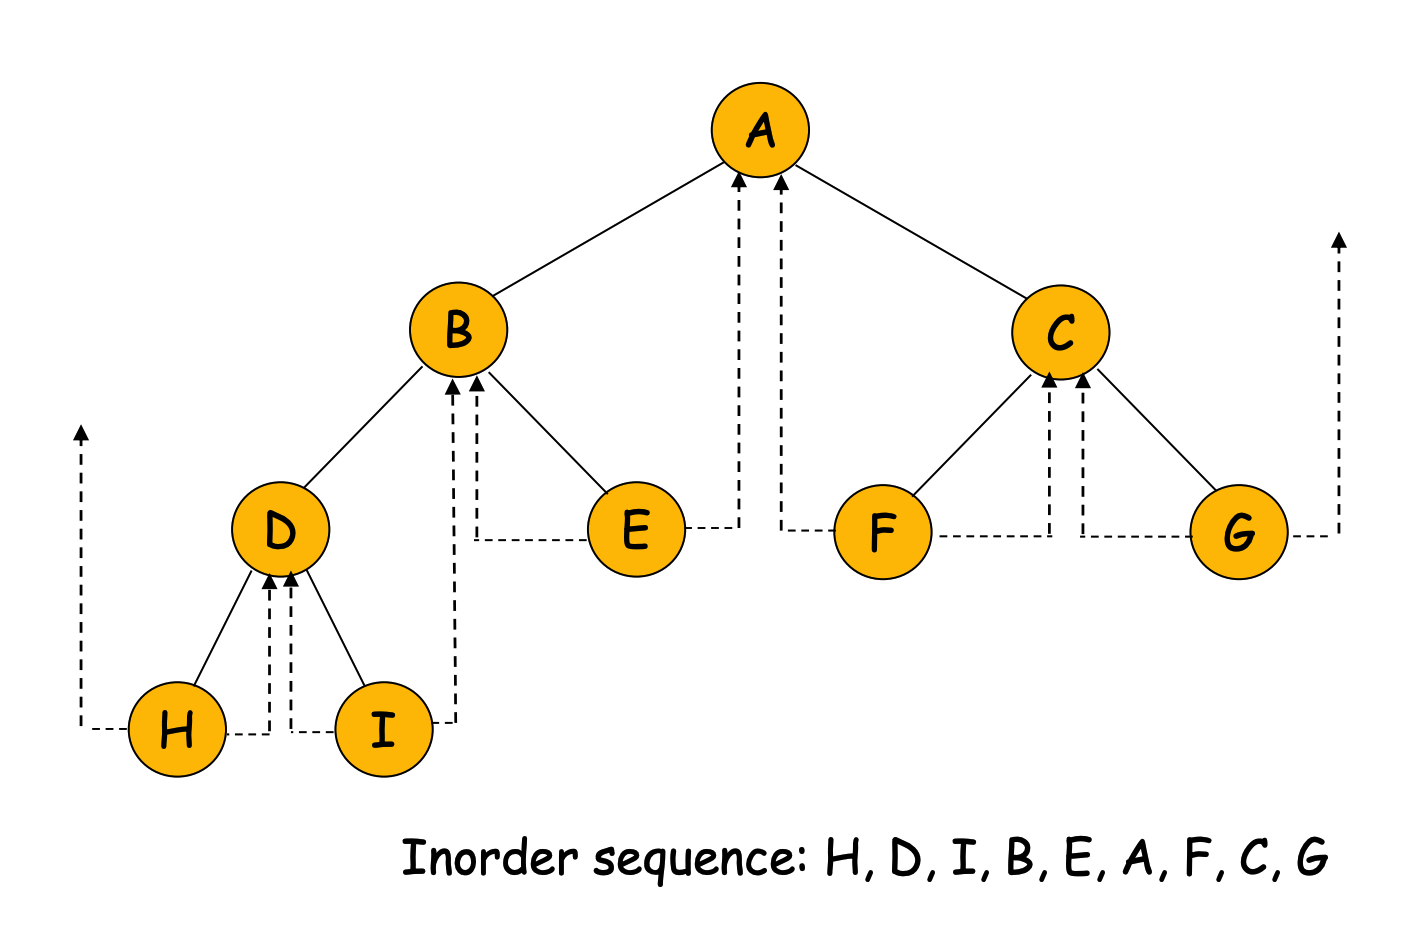

In [ ]:
# prompt: give me a threaded tree

from dataclasses import dataclass

@dataclass
class ThreadNode:
    data: int = 0
    right: 'ThreadNode' = None
    left: 'ThreadNode' = None
    is_threaded_right: bool = False  # Flag to indicate if the right pointer is a thread


def create_threaded_tree(root):
    """Converts a binary tree to a threaded binary tree (inorder traversal)."""

    if root is None:
        return None

    def _threaded_inorder(node):
        nonlocal prev  # Access the 'prev' variable in the outer scope

        if node is not None:
            _threaded_inorder(node.left)

            if prev is not None and prev.right is None:
                prev.right = node
                prev.is_threaded_right = True

            prev = node

            _threaded_inorder(node.right)

    prev = None  # Keep track of the previously visited node
    _threaded_inorder(root)

    # Find the last node in inorder traversal
    last_node = root
    while last_node.right and not last_node.is_threaded_right:
        last_node = last_node.right

    if last_node:
        last_node.right = None

    return root

def inorder_threaded_traversal(root):
    """Performs inorder traversal of a threaded binary tree."""
    if not root:
        return

    current = root
    while current:
        while current.left:
            current = current.left

        print(current.data, end=" ")

        if current.is_threaded_right:
            current = current.right
        else:
            current = current.right
            while current and current.left:
                current = current.left

- How to add a node like r as the child of s ?


ببین اول فرض می کنیم جایی که قرار هست اینا اد بشن رو داریم
```python
def add(r,s):

  r.rightTread = s.rightTread
  # اگه خودش فرزند داشته باشه اینم داره
  r.right = s.right
  # فرزند داشته باشه یا نه بالاخره
  # ما اونی که توی این اوردر کال میشه رو میذاریم

  r.leftTread = True
  r.left = s

  s.right = r
  s.rightTread = False

  if(!r.rightTread):
    # اگه همسایه راست نداشت
    temp = InorderSuc(r)
    temp.left = r
```



# Heap

We can implement the *priority queue* with these heaps

- insersion will take O(n) if we have skewed tree and it will take logn if we have complete tree : it takes the hight of the tree

و دقیقا الگوریتم مرج سورت رو میشه با کمک هیپ ها پیاده سازی کرد

In [ ]:
# prompt: give me a heap (don't implement the threaded tree) from scratch

class Heap:
    def __init__(self):
        self.heap_list = [0]  # Initialize with a dummy element at index 0
        self.current_size = 0

    def perc_up(self, i):
        while i // 2 > 0:
            if self.heap_list[i] < self.heap_list[i // 2]:
                self.heap_list[i], self.heap_list[i // 2] = self.heap_list[i // 2], self.heap_list[i]
            i = i // 2

    def insert(self, k):
        self.heap_list.append(k)
        self.current_size += 1
        self.perc_up(self.current_size)

    def perc_down(self, i):
        while (i * 2) <= self.current_size:
            mc = self.min_child(i)
            if self.heap_list[i] > self.heap_list[mc]:
                self.heap_list[i], self.heap_list[mc] = self.heap_list[mc], self.heap_list[i]
            i = mc

    def min_child(self, i):
        if (i * 2) + 1 > self.current_size:
            return i * 2
        else:
            if self.heap_list[i * 2] < self.heap_list[(i * 2) + 1]:
                return i * 2
            else:
                return (i * 2) + 1

    def del_min(self):
        ret_val = self.heap_list[1]
        self.heap_list[1] = self.heap_list[self.current_size]
        self.current_size -= 1
        self.heap_list.pop()
        self.perc_down(1)
        return ret_val

    def build_heap(self, alist):
        i = len(alist) // 2
        self.current_size = len(alist)
        self.heap_list = [0] + alist[:]
        while i > 0:
            self.perc_down(i)
            i -= 1

اگه خونه صفر رو در نظر نمی گیری پس دوبرابر به علاوه یک و دو برابر

اگه خونه صفر رو هم میگیری
دوبرابر به علاوه ۱ و ۲ رو در نظر بگیر

In [ ]:
class heap():
  def __init__(self):
    self.heap_list : list = [0]
    self.current_size :int = 0

  def __repr__(self) -> str :
    return str(self.heap_list)

  def parent_index(self,index : int):
    if index > 0 :
      return index // 2
    else:
      return None

  def leftchild(self , index : int):
    """
    return the left child index if the left child exists.
    if not, return None.
    """
    if self.heaplist.left :
      return index * 2
    else :
      return None

  def rightchild(self , index : int):
    """
    return the right child index if the right child exists.
    if not, return None.
    """
    if self.heaplist.right :
      return index * 2 + 1
    else :
      return None

  def max_heapify1(self, index: int) -> None:
    # Void function
    """
    # عملا در اینجا گارانتی شده که فقط یه وایولیشن خواهیم داشت
    correct a single violation of the heap property in a subtree's root.
    It is the function that is responsible for restoring the property
    of Max heap i.e the maximum element is always at top.
    """
    if self.current_size > index :
      # باید چک کنه شرط درخت برقرار باشه
      v = self.heap_list[index]
      l = self.leftchild(index)
      r = self.rightchild(index)
      index1 = -1
      index2 = -1
      if ((self.heap_list[index] < self.heap_list[l]) and (self.heap_list[l] is not None)) :
         self.heap_list[l] , self.heap_list[index] = self.heap_list[index] , self.heap_list[l]
         index1 = index

      if ((self.heap_list[index] > self.heap_list[r]) and (self.heap_list[l] is not None)) :
         self.heap_list[r] , self.heap_list[index] = self.heap_list[index] , self.heap_list[r]
         index2 = index

      if(index1 != -1) :
        self.max_heapify(index1)
      if(index2 != -1) :
        self.max_heapify(index2)


  def max_heapify(self, index: int) -> None:
    largest = index
    left = self.leftchild(index)
    right = self.rightchild(index)

    if left is not None and self.heap_list[left] > self.heap_list[largest]:
        largest = left
    if right is not None and self.heap_list[right] > self.heap_list[largest]:
        largest = right

    if largest != index:
        self.heap_list[index], self.heap_list[largest] = self.heap_list[largest], self.heap_list[index]
        self.max_heapify(largest)

  def build_max_heap(self, x : list ) -> None :
      for i , j in enumerate(x , 0):
      #for i in x , j in range(1,len(x)+1):
        self.heap_list.append(i)
        self.max_heapify(0)




یه چیزی که اینجا خیلی جالبه اینه که یه دونه تابع داره اسمش رپره و تهش میاد اون چیزی که اون داخل داره میگذره رو پرینت میکنه

In [ ]:
h = heap()
h.build_max_heap([1,2,3,4,5,6,7,8,9])
print(h)

AttributeError: 'heap' object has no attribute 'heaplist'

# Generic Programming in python



In [ ]:
from typing import Generic, TypeVar

T = TypeVar('T')

class Box(Generic[T]):
    def __init__(self, content: T):
        self.content = content

    def get_content(self) -> T:
        return self.content

# Usage
int_box = Box[int](42)
str_box = Box[str]("Hello, World!")

print(int_box.get_content())  # Output: 42
print(str_box.get_content())  # Output: Hello, World!

# Type checking
print(type(int_box.get_content()))  # Revealed type is 'int'
print(type(str_box.get_content()))  # Revealed type is 'str'

42
Hello, World!
<class 'int'>
<class 'str'>


# \_\_repr\_\_ and \_\_str\_\_

خب عملا این دوتا تابع یه تابع هایی هستند که به کلاس میگن شما وقتی ما پرینتت کردیم بیا اینا رو فراخوانی کن

فرق استرینگ و ریپر اینه که وقتی استرینگ کردی میاد استی آر رو فراخوانی می کنی

```python
class Person:
    def __init__(self, name, age, city):
        self.name = name
        self.age = age
        self.city = city

    def __str__(self):
        return f"{self.name}, {self.age} years old"

    def __repr__(self):
        return f"Person(name='{self.name}', age={self.age}, city='{self.city}')"

# Create a Person object
person = Person("Alice", 30, "New York")

# Using str() and print()
print(str(person))  # Output: Alice, 30 years old
print(person)       # Output: Alice, 30 years old (print() uses __str__ by default)
```


# The Bag ADT (Abstract Data Type)

Is the set with duplicate value

In [ ]:
class Bag():

  def __init__(self):
    self.items = []

  def is_empty(self):
    return self.item.is_empty()

  def __len__(self):
    return len(self.items)

  def NumContain(self):
    return len(set(self.items))

  def Degree(self , item ):
    return([x for x in self.items for x in item])
    # return(self.items.count(*item))
    '''
    from collections import Counter

    my_list = [1, 2, 3, 2, 4, 2, 5]
    counter = Counter(my_list)
    print(counter[2])  # Prints: 3
    print(counter)  # Prints: Counter({2: 3, 1: 1, 3: 1, 4: 1, 5: 1})
    '''
  def delete(self,item):
    self.items.remove(item)

  def equal(self,item):
    return self.items == item

  def uniqueElements(self):
    y = set(self.item)
    z = [x for x in y if(self.Degree(x) <= 1)]
    return Bag(z)


  def __contains__(self,item):
    return item in self.items

  def add(self,item):
    self.items.append(item)

\_\_contain\_\_ and \_\_len\_\_

این چندتا می تونن هر کدوم از این توابع داخل کلاس ها پیاده سازی شده و به نظر میاد اگر چیزی رو هم از سوپر کلاس آبجکت بیای و فراخونی کنی هم باز همین متد ها رو داره کلا

In [ ]:
class test(object):
  def __init__(self):
    self.a = 1

t = test
print(t.__dict__)

{'__module__': '__main__', '__init__': <function test.__init__ at 0x793412504550>, '__dict__': <attribute '__dict__' of 'test' objects>, '__weakref__': <attribute '__weakref__' of 'test' objects>, '__doc__': None}


# The Collections of python



خب حقیقتا الان دارم فکر می کنم که احتمالا برای اینی که یه چیزی رو به ماجول تبدیل کنی احتمالا باید یکسری تابع رو پیش نیازش باشه

- name
- package
- loader
- file
- cached : the place

In [ ]:
import collections as clt

print(clt.__dict__)

{'__name__': 'collections', '__doc__': "This module implements specialized container datatypes providing\nalternatives to Python's general purpose built-in containers, dict,\nlist, set, and tuple.\n\n* namedtuple   factory function for creating tuple subclasses with named fields\n* deque        list-like container with fast appends and pops on either end\n* ChainMap     dict-like class for creating a single view of multiple mappings\n* Counter      dict subclass for counting hashable objects\n* OrderedDict  dict subclass that remembers the order entries were added\n* defaultdict  dict subclass that calls a factory function to supply missing values\n* UserDict     wrapper around dictionary objects for easier dict subclassing\n* UserList     wrapper around list objects for easier list subclassing\n* UserString   wrapper around string objects for easier string subclassing\n\n", '__package__': 'collections', '__loader__': <_frozen_importlib_external.SourceFileLoader object at 0x793448f6067

# Reverse Problem

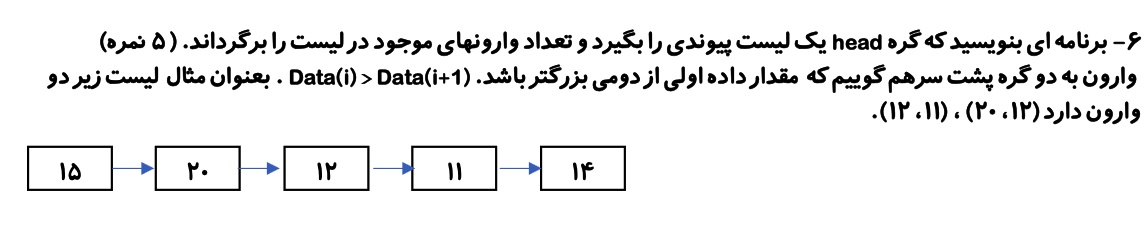

In [ ]:
class ListNode:
    def __init__(self, data=0, next=None):
        self.data = data
        self.next = next

def count_inversions(head):
    if not head or not head.next:
        return 0

    count = 0
    current = head

    while current.next:
        if current.data > current.next.data:
            count += 1
        current = current.next

    return count

# Tree Merging

فکر می کنم شما باید زیرشاخه ها رو سمت چپ ردیف کنی

و سمت راست همشون باید درخت های دیگه رو راسشون رو ردیف کنی



# MidTerm Ideas

هر الگوریتم بازگشتی رو میشه با استک زد

چرا ؟

جون خود سیستم هم یه استک داره حالا ما میایم عملیات ها رو دستی بدون نظم و کنترل شده تر به نظر خودمون وارد استک می کنیم

ولی خب هر بازگشتی رو نمیشه با استک زد

و تنها چلنچ دیگه ای هم که داره اینه که سیستم استک محدودیت داره ولی این استک اضافی که ما بگیریم این محدودیت رو نداره


ctrl + z : این رو با لینک لیست پیاده کردند

log(n!) = nlogn

می دونی اینجا یه ایده ای زد به ذهنم

مثلا الگوریتمی که ما باید همه فضا رو بگردیم تا جواب پیدا کنیم رو در نظر بگیر

حالا دیواید اند کانکور میاد این رو نصف می کنه

انگار یه جورایی ترکیب باینری سرچ و فضا با ان فاکتوریل حالت

-------

